In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
data = pd.read_csv(r'./predict-student-performance-from-game-play/train.csv')
data_label = pd.read_csv(r'./predict-student-performance-from-game-play/train_labels.csv')

In [4]:
print(data.shape)
print(data_label.head(1000))  
session_id_list = []
question_list = []
for i in range(len(data_label)):
    session_id_list.append(data_label['session_id'].iloc[i].split('_')[0])
    question_list.append(int(data_label['session_id'].iloc[i].split('_')[1][1:]))
data_label['session_id_2']= pd.Series(session_id_list)
data_label['question_id']= pd.Series(question_list)
data_label.head(100)

(26296946, 20)
               session_id  correct
0    20090312431273200_q1        1
1    20090312433251036_q1        0
2    20090312455206810_q1        1
3    20090313091715820_q1        0
4    20090313571836404_q1        1
5    20090314035813970_q1        1
6    20090314121766812_q1        1
7    20090314221187252_q1        0
8    20090314363702160_q1        1
9    20090314441803444_q1        1
10   20090315081004164_q1        0
11   20090315085850788_q1        1
12   20090315101457836_q1        1
13   20090315170769824_q1        1
14   20090315270479452_q1        0
15   20090316152177500_q1        1
16   20090316190523732_q1        1
17   20090317080721164_q1        0
18   20090317111400710_q1        1
19   20090317414400068_q1        1
20   20090318021527530_q1        0
21   20090318322359292_q1        1
22   20090318541618010_q1        1
23   20090319012741024_q1        0
24   20090320140443148_q1        0
25   20100000291486630_q1        0
26   20100000404860470_q1        1
27   

,session_id,correct,session_id_2,question_id
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1
5,20090314035813970_q1,1,20090314035813970,1
6,20090314121766812_q1,1,20090314121766812,1
7,20090314221187252_q1,0,20090314221187252,1
8,20090314363702160_q1,1,20090314363702160,1
9,20090314441803444_q1,1,20090314441803444,1


In [6]:
data_label[data_label['session_id_2']=='20090312431273200']
new = data_label.groupby('question_id')['correct'].value_counts(normalize=True)
new = pd.DataFrame(new).rename(columns = dict(correct='value_count'))
new

value_count
question_id correct             
1           1           0.727485
            0           0.272515
2           1           0.978822
            0           0.021178
3           1           0.934004
            0           0.065996
4           1           0.798234
            0           0.201766
5           1           0.548256
            0           0.451744
6           1           0.775953
            0           0.224047
7           1           0.736058
            0           0.263942
8           1           0.617223
            0           0.382777
9           1           0.736270
            0           0.263730
10          1           0.505432
            0           0.494568
11          1           0.643621
            0           0.356379
12          1           0.862957
            0           0.137043
13          0           0.724896
            1           0.275104
14          1           0.707665
            0           0.292335
15          0           0.518971
            1           0.481029
16          1           0.734870
            0           0.265130
17          1           0.687802
            0           0.312198
18          1           0.950641
            0           0.049359

In [5]:
groupby_sid = data_label.groupby(['session_id_2','question_id']).agg({'correct':'sum'}).rename(columns={'correct':'newname'})

groupby_sid2 = groupby_sid.reset_index()  # index to columns
groupby_sid2.head(100)

,session_id_2,question_id,newname
0,20090312431273200,1,1
1,20090312431273200,2,1
2,20090312431273200,3,1
3,20090312431273200,4,1
4,20090312431273200,5,1
5,20090312431273200,6,1
6,20090312431273200,7,1
7,20090312431273200,8,1
8,20090312431273200,9,1
9,20090312431273200,10,1


In [7]:
session_id_str_dic = {}
for i in range(groupby_sid2['session_id_2'].nunique()): #23562个session
    session_id = groupby_sid2.loc[18*i,'session_id_2']
    session_id_str = ''
    for k in range(18):
        session_id_str += str(groupby_sid2.loc[18*i+k]['newname'])
    
    session_id_str_dic[session_id] = session_id_str
print(session_id_str_dic)
print(len(session_id_str_dic))

{'20090312431273200': '111111111111011011', '20090312433251036': '011101101001010101', '20090312455206810': '111111111111110111', '20090313091715820': '011110111001010111', '20090313571836404': '111111111110101111', '20090314035813970': '111101111001010101', '20090314121766812': '111001100111011101', '20090314221187252': '011010010001011101', '20090314363702160': '111111111111010011', '20090314441803444': '111111010101011111', '20090315081004164': '011100111101111111', '20090315085850788': '111101111011010101', '20090315101457836': '111111101011111011', '20090315170769824': '111111111101011101', '20090315270479452': '011100101000000001', '20090316152177500': '111101111001010001', '20090316190523732': '111111111111010111', '20090317080721164': '001000010000000101', '20090317111400710': '111100100011111011', '20090317414400068': '111101101111010101', '20090318021527530': '011100110011000111', '20090318322359292': '111111111101001111', '20090318541618010': '111101101000011111', '200903190

In [10]:
klist = []
vlist = []
for k,v in session_id_str_dic.items():
    klist.append(k)
    vlist.append(','.join(list(v)))
    #vlist.append(',')
session_df = pd.DataFrame({'session_id':klist,'question_vector':vlist})
session_df.to_csv('session_df.csv')
session_df_array = session_df.set_index('session_id')
session_df_array.head(10)

,question_vector
session_id,
20090312431273200,"1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1"
20090312433251036,"0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1"
20090312455206810,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1"
20090313091715820,"0,1,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,1"
20090313571836404,"1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1"
20090314035813970,"1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1"
20090314121766812,"1,1,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1"
20090314221187252,"0,1,1,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1"
20090314363702160,"1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1"


In [11]:
def CosSimilarity(list1,list2):
    if len(list1)!=len(list2):
        return -1
    else:
        length=len(list1)
    s = sum(list1[i] * list2[i] for i in range(length))
    den1 = math.sqrt(sum([pow(list1[j], 2) for j in range(length)]))
    den2 = math.sqrt(sum([pow(list2[k], 2) for k in range(length)]))
    return s / (den1 * den2)

In [14]:
newl = []
for i in range(23562):
    a = session_df.loc[i,'question_vector'].split(',')
    vector = np.array([item.strip() for item in a])
    vector_of_integers = [int(item) for item in vector]
    newl.append(vector_of_integers)
vectors = np.array(newl)

In [17]:
import math
newv = vectors.T
print(newv.shape)
count = 0
similarities_matrix_2 = np.zeros((18,18))
for i,row in enumerate(newv):
    for j,vector in enumerate(newv):
        similarities_matrix_2[i, j] = CosSimilarity(row, vector)
    count += 1
    print(count)
similarities_matrix_2

(18, 23562)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


array([[1.        , 0.85179457, 0.84387953, 0.81018473, 0.70629641,
        0.80552258, 0.77741735, 0.70430327, 0.78600389, 0.67933589,
        0.72797727, 0.81568798, 0.49996318, 0.76624194, 0.65890407,
        0.74646877, 0.72202795, 0.84299514],
       [0.85179457, 1.        , 0.9598375 , 0.8924902 , 0.74064692,
        0.8777474 , 0.85451964, 0.78169402, 0.85589631, 0.71007973,
        0.7977386 , 0.92255736, 0.52295006, 0.83957125, 0.69360314,
        0.84950555, 0.82212412, 0.96675659],
       [0.84387953, 0.9598375 , 1.        , 0.8766402 , 0.73110429,
        0.86396154, 0.8395649 , 0.7656284 , 0.84062103, 0.70109649,
        0.78375573, 0.90354067, 0.5161764 , 0.82398015, 0.68282255,
        0.83307152, 0.80709307, 0.94585499],
       [0.81018473, 0.8924902 , 0.8766402 , 1.        , 0.74022131,
        0.83478746, 0.81458854, 0.74329219, 0.81945363, 0.6941015 ,
        0.75429777, 0.85300199, 0.4993007 , 0.80439849, 0.68683341,
        0.77485029, 0.74868579, 0.88296699],
    

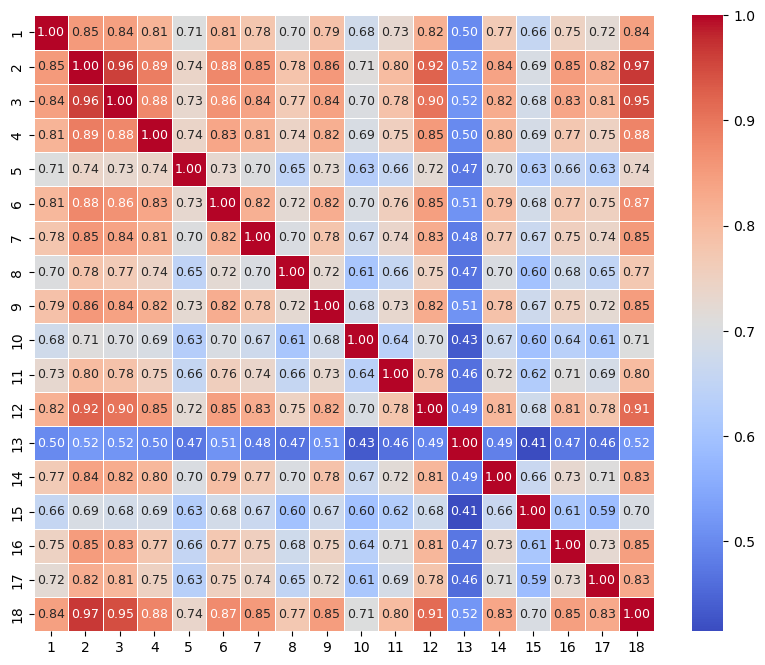

In [18]:
import seaborn as sns

x_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
y_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
plt.figure(figsize=(10, 8))
sns.heatmap(similarities_matrix_2, xticklabels=x_labels,yticklabels=y_labels,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,annot_kws = {"size": 9})
plt.savefig('question_correlation.png')
# 显示热力图
plt.show()
